# Data Analysis Project 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from factor_analyzer import FactorAnalyzer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [83]:
# Download the list of S&P 500 tickers from Wikipedia
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_table = pd.read_html(sp500_url)[0]
sp500_tickers = sp500_table['Symbol'].tolist()


# Define the start and end dates for the data
start_date = '2016-01-01'
end_date = '2022-12-31'

**The S&P 500 Index**, commonly referred to as the S&P 500, is a stock market index that tracks the stock performance of 500 large publicly traded companies in the United States. It is considered one of the most widely-followed equity indices and is often used as a benchmark for the performance of the U.S. stock market as a whole. Many investors also use the S&P 500 Index as a reference point for evaluating the performance of their own stock portfolios or for making investment decisions.

We will use data from **2016/01/01 to 2022/12/32**

In [84]:
#download prices data
data = yf.download(sp500_tickers, start=start_date, end=end_date)

# Keep only the 'Close' prices for each stock
prices = data['Close']

# Calculate daily returns for each stock
returns = prices.pct_change()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


As **BRK.B BF.B** are delisted so we will remove them since they reprsent less than 1% of the data 

In [85]:
sp500_tickers.remove("BF.B")
sp500_tickers.remove("BRK.B")
sp500_tickers.append("BF-B")
sp500_tickers.append("BRK-B")

In [86]:
#download prices data
data = yf.download(sp500_tickers, start=start_date, end=end_date)

# Keep only the 'Close' prices for each stock
prices = data['Close']

# Calculate daily returns for each stock
returns = prices.pct_change()

[*********************100%***********************]  503 of 503 completed


In [87]:
returns.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,...,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.000886,-0.000074,0.000217,0.001090,0.000734,0.000448,0.000657,0.000735,0.000680,0.000967,...,0.000652,0.000480,0.000378,-0.000153,0.000797,0.000627,0.000316,0.001082,0.000604,0.000775
std,0.017092,0.034722,0.021624,0.019150,0.017139,0.018515,0.015715,0.018035,0.016308,0.021426,...,0.033167,0.013835,0.018858,0.019756,0.017916,0.015233,0.018509,0.025085,0.022782,0.016253
min,-0.110117,-0.252246,-0.203439,-0.128647,-0.162524,-0.130314,-0.097857,-0.168752,-0.083899,-0.167932,...,-0.244346,-0.126918,-0.122248,-0.186416,-0.120273,-0.109992,-0.139943,-0.177693,-0.120465,-0.146956
25%,-0.007121,-0.015685,-0.009392,-0.007564,-0.007160,-0.008897,-0.006214,-0.006463,-0.006387,-0.007483,...,-0.014833,-0.005867,-0.008484,-0.008608,-0.007486,-0.005682,-0.007710,-0.010606,-0.011605,-0.006750
50%,0.001428,-0.000563,0.000263,0.000893,0.001234,0.000918,0.000980,0.001076,0.001374,0.001563,...,-0.000318,0.000796,0.000256,0.000629,0.000772,0.000715,0.000173,0.001109,0.000902,0.001041
75%,0.009754,0.015439,0.010901,0.010511,0.008561,0.009976,0.008981,0.008134,0.008204,0.011068,...,0.015491,0.007315,0.009168,0.009215,0.009524,0.007150,0.008824,0.012711,0.012124,0.009068
max,0.098394,0.410970,0.163345,0.119808,0.137673,0.118151,0.109360,0.153577,0.128573,0.177193,...,0.276883,0.112577,0.126868,0.176485,0.112620,0.232484,0.155797,0.172142,0.238811,0.119793


In [88]:
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003441,-0.009533,-0.006831,-0.025059,-0.004166,0.014626,-0.000233,0.003631,0.005205,0.004023,...,0.018904,0.010084,0.008521,0.020387,-0.000277,-0.002493,0.020823,-0.025117,-0.010857,0.015655
2016-01-06,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,-0.008388,0.001592,-0.001954,-0.014295,...,-0.051805,0.010538,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208
2016-01-07,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.023966,-0.001011,-0.029366,-0.020984,...,-0.094070,0.003842,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404
2016-01-08,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,-0.020944,-0.010414,-0.009681,-0.014140,...,-0.040704,-0.010935,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001476,0.011943,0.008446,-0.002798,-0.001041,0.004372,0.001389,0.008433,0.005023,0.005735,...,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,-0.000789,0.002869,0.003521,0.005033
2022-12-27,0.002144,-0.014162,0.012144,-0.013878,-0.000674,-0.005941,0.003605,0.003787,-0.002931,-0.009928,...,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008050,-0.003156
2022-12-28,-0.009763,-0.016760,0.001931,-0.030685,-0.004663,-0.009704,-0.006816,-0.016033,-0.008255,-0.020174,...,-0.050279,-0.013972,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117


This table here represents the returns of each company from "2016-01-01"to "2022-12-31"

The first Row is Null because of the formulate of calculation of The return wich is :

$return=\frac{stock\_closeday_{n+1}-stock\_close\_day_{n}}{stock\_close\_day_{n}}$

In [89]:
returns =returns.drop(returns.index[0])

# Data Cleaning

In [90]:
returns.shape

(1761, 503)

In [91]:
m=returns.isnull().sum()
missing=[]
for i in m.index : 
        if  m[i]!=0 : 
          missing.append(i)
missing

['CARR',
 'CDAY',
 'CEG',
 'CTVA',
 'DOW',
 'FOX',
 'FOXA',
 'FTV',
 'GEHC',
 'HWM',
 'INVH',
 'IR',
 'LW',
 'MRNA',
 'OGN',
 'OTIS',
 'VICI']

In [92]:
for i in missing : 
    print(i+" : {}".format(returns[i].isnull().sum()))

CARR : 1059
CDAY : 582
CEG : 1522
CTVA : 853
DOW : 807
FOX : 802
FOXA : 801
FTV : 126
GEHC : 1751
HWM : 210
INVH : 272
IR : 342
LW : 217
MRNA : 738
OGN : 1350
OTIS : 1059
VICI : 503


We observed that certain companies have a significantly higher number of missing values compared to others. As a solution, we will remove the companies that have more than 500 missing days. For the remaining companies, we will fill their missing data by calculating the mean value over their existing period in the **S&P 500** .

In [93]:
Companies_to_drop=[]
for i in missing : 
    if returns[i].isnull().sum()>600 : 
        Companies_to_drop.append(i)

In [94]:
returns.drop(Companies_to_drop,axis=1,inplace=True)

In [95]:
returns.fillna(returns.mean(),inplace=True)

In [96]:
returns.isna().sum().sum()

0

In [97]:
sns.set()

# Data Clustering

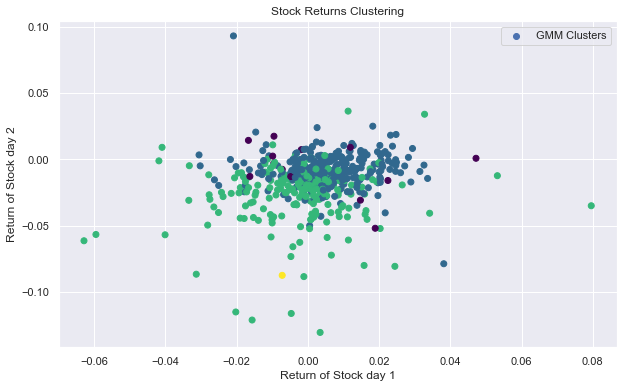

In [98]:
# Transpose the DataFrame to have stocks as columns and dates as index
df = returns.T

# Select the return data for clustering
X = df.values

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=4 , random_state=0)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)


# Plotting the clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', label='GMM Clusters')

plt.xlabel('Return of Stock day 1')
plt.ylabel('Return of Stock day 2')
plt.title('Stock Returns Clustering')
plt.legend()
plt.show()

When performing **GMM clustering** on the entire dataset, we do not obtain meaningful or interpretable results. Therefore, we will attempt clustering on a subset of the data, specifically two days of returns, to determine whether this approach provides more valuable insights.

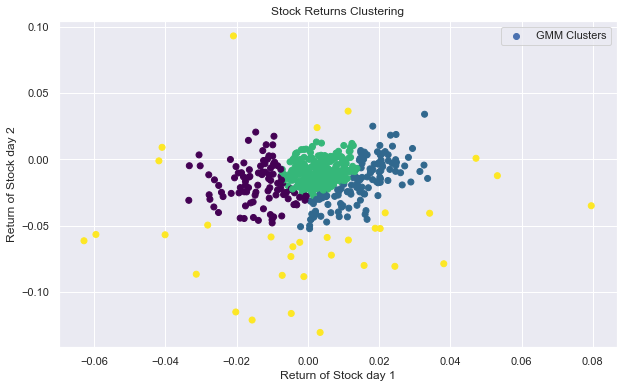

In [99]:
# Transpose the DataFrame to have stocks as columns and dates as index
df = returns[0:2].T

# Select the return data for clustering
X = df.values

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=4 , random_state=0)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)


# Plotting the clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', label='GMM Clusters')

plt.xlabel('Return of Stock day 1')
plt.ylabel('Return of Stock day 2')
plt.title('Stock Returns Clustering')
plt.legend()
plt.show()

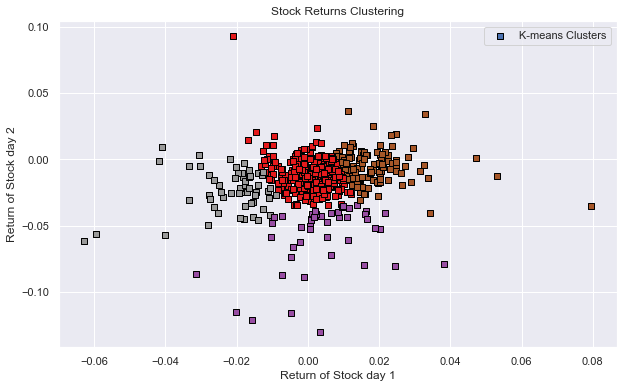

In [100]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_
# Plotting the clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Set1', marker='s', edgecolors='black', label='K-means Clusters')

plt.xlabel('Return of Stock day 1')
plt.ylabel('Return of Stock day 2')
plt.title('Stock Returns Clustering')
plt.legend()
plt.show()

Here, we observe that the GMM clusters the data into four regions. From my understanding, the GMM measures the variability of stock returns from one day to another, thereby clustering them based on their level of risk and variability in returns. Hence, when applying GMM and K-means clustering to the entire dataset, it clusters the data according to the extent of risk and **variability** they possess in terms of **returns**.

In the next section, we are going to apply the PCA on the returns

# PCA

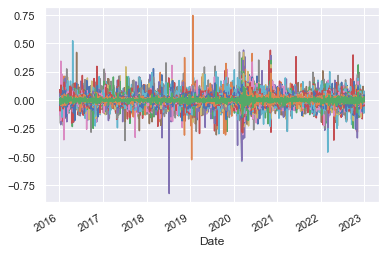

In [101]:
returns.plot()
plt.legend().remove()

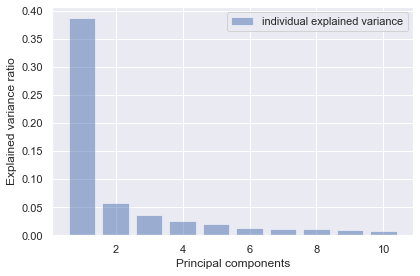

In [102]:
n_c=10
pca = PCA().fit(returns)


plt.figure(figsize=(6, 4))

plt.bar(range(1,n_c+1),pca.explained_variance_ratio_[:10], alpha=0.5, align='center', 
label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Considering all data, half of the variance can be explained by just one principal component. While this is good pimarily (we won't need to train a model on many more variables).

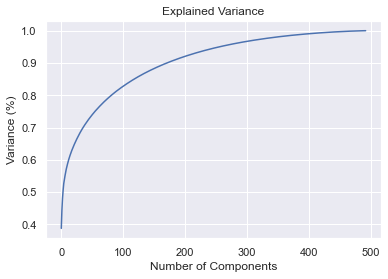

In [103]:
# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')

# show the plot
plt.show()

# Factor Analysis

## Adequacy Test

**Kaiser-Meyer-Olkin (KMO) Test**

In [104]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [105]:
kmo_all,kmo_model=calculate_kmo(returns)
kmo_model

C:\Users\Imed\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9921938172279108

The **Kaiser-Meyer-Olkin (KMO)** test is a measure used to assess the suitability of data for factor analysis. It quantifies the degree of common variance among variables in a dataset. A KMO value ranges from 0 to 1, with values close to 1 indicating a high degree of common variance, and thus, favorable conditions for factor analysis.

In your case, obtaining a KMO value of 0.99 suggests that the variables in your stock return dataset share an exceptionally high degree of common variance. This implies that there is a strong relationship and interdependency among the stocks' returns, indicating that they potentially reflect similar underlying factors or trends. Such a high KMO value signifies that factor analysis is highly appropriate for your data, and the extracted factors are likely to provide meaningful insights into the structure of your stock return data.

With a KMO value of 0.99, you can have confidence in the validity and reliability of the factor analysis results.

**Bartlett’s test**

In [106]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [107]:
chi_square_value,p_value=calculate_bartlett_sphericity(returns)
chi_square_value, p_value

(989823.4644351106, 0.0)

The extremely low p-value (0.0) indicates strong evidence against the null hypothesis, suggesting that the observed correlation matrix is significantly different from the identity matrix.

This result indicates that there is a significant relationship among the variables in your stock return dataset. The low p-value suggests that there is a non-random structure in the correlation matrix, further supporting the suitability of your data for factor analysis.

The **Bartlett's test** result reinforces the idea that conducting factor analysis on your stock return data is appropriate and meaningful. It confirms the presence of interdependencies and relationships among the stock returns, which can be effectively captured and analyzed using factor analysis techniques.

**Choosing the Number of Factors**

In [108]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(returns)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
pd.DataFrame(ev,columns=['Original_Eigenvalues'])

,Original_Eigenvalues
0,195.894187
1,26.780994
2,21.274064
3,10.470805
4,7.221138
...,...
488,0.035018
489,0.034527
490,0.033116
491,0.014949


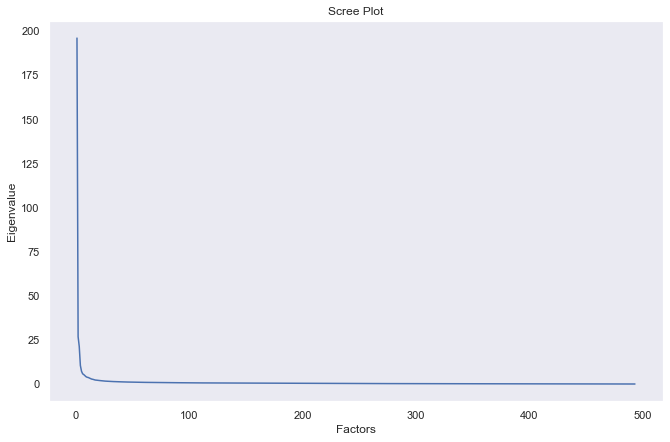

In [109]:
# Create scree plot using matplotlib
plt.figure(figsize=(11,7))

plt.plot(range(1,returns.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Performing Factor Analysis

**Factor Analysis using the "varimax" rotation :**

In [110]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 6,rotation="varimax")
fa.fit(returns)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [111]:
pd.DataFrame(fa.loadings_,columns=[f'Factor_{i+1}' for i in range(fa.n_factors)]).set_index(returns.columns)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
A,0.295680,0.648743,0.222283,0.063191,0.229739,0.092450
AAL,0.671511,0.178085,0.025941,0.015827,-0.069741,-0.027384
AAP,0.405181,0.244084,0.266779,-0.030681,-0.028404,0.164492
AAPL,0.248037,0.669187,0.205742,0.107808,0.047452,0.111795
ABBV,0.201901,0.316741,0.218505,0.130310,0.351295,0.029227
...,...,...,...,...,...,...
YUM,0.467826,0.397818,0.339341,0.039108,0.004922,-0.052706
ZBH,0.479246,0.374325,0.217736,0.136316,0.131978,-0.158961
ZBRA,0.361467,0.539846,0.106335,0.090580,0.021495,0.136955
ZION,0.797703,0.110941,0.055874,0.085252,0.272252,0.067101


<AxesSubplot:>

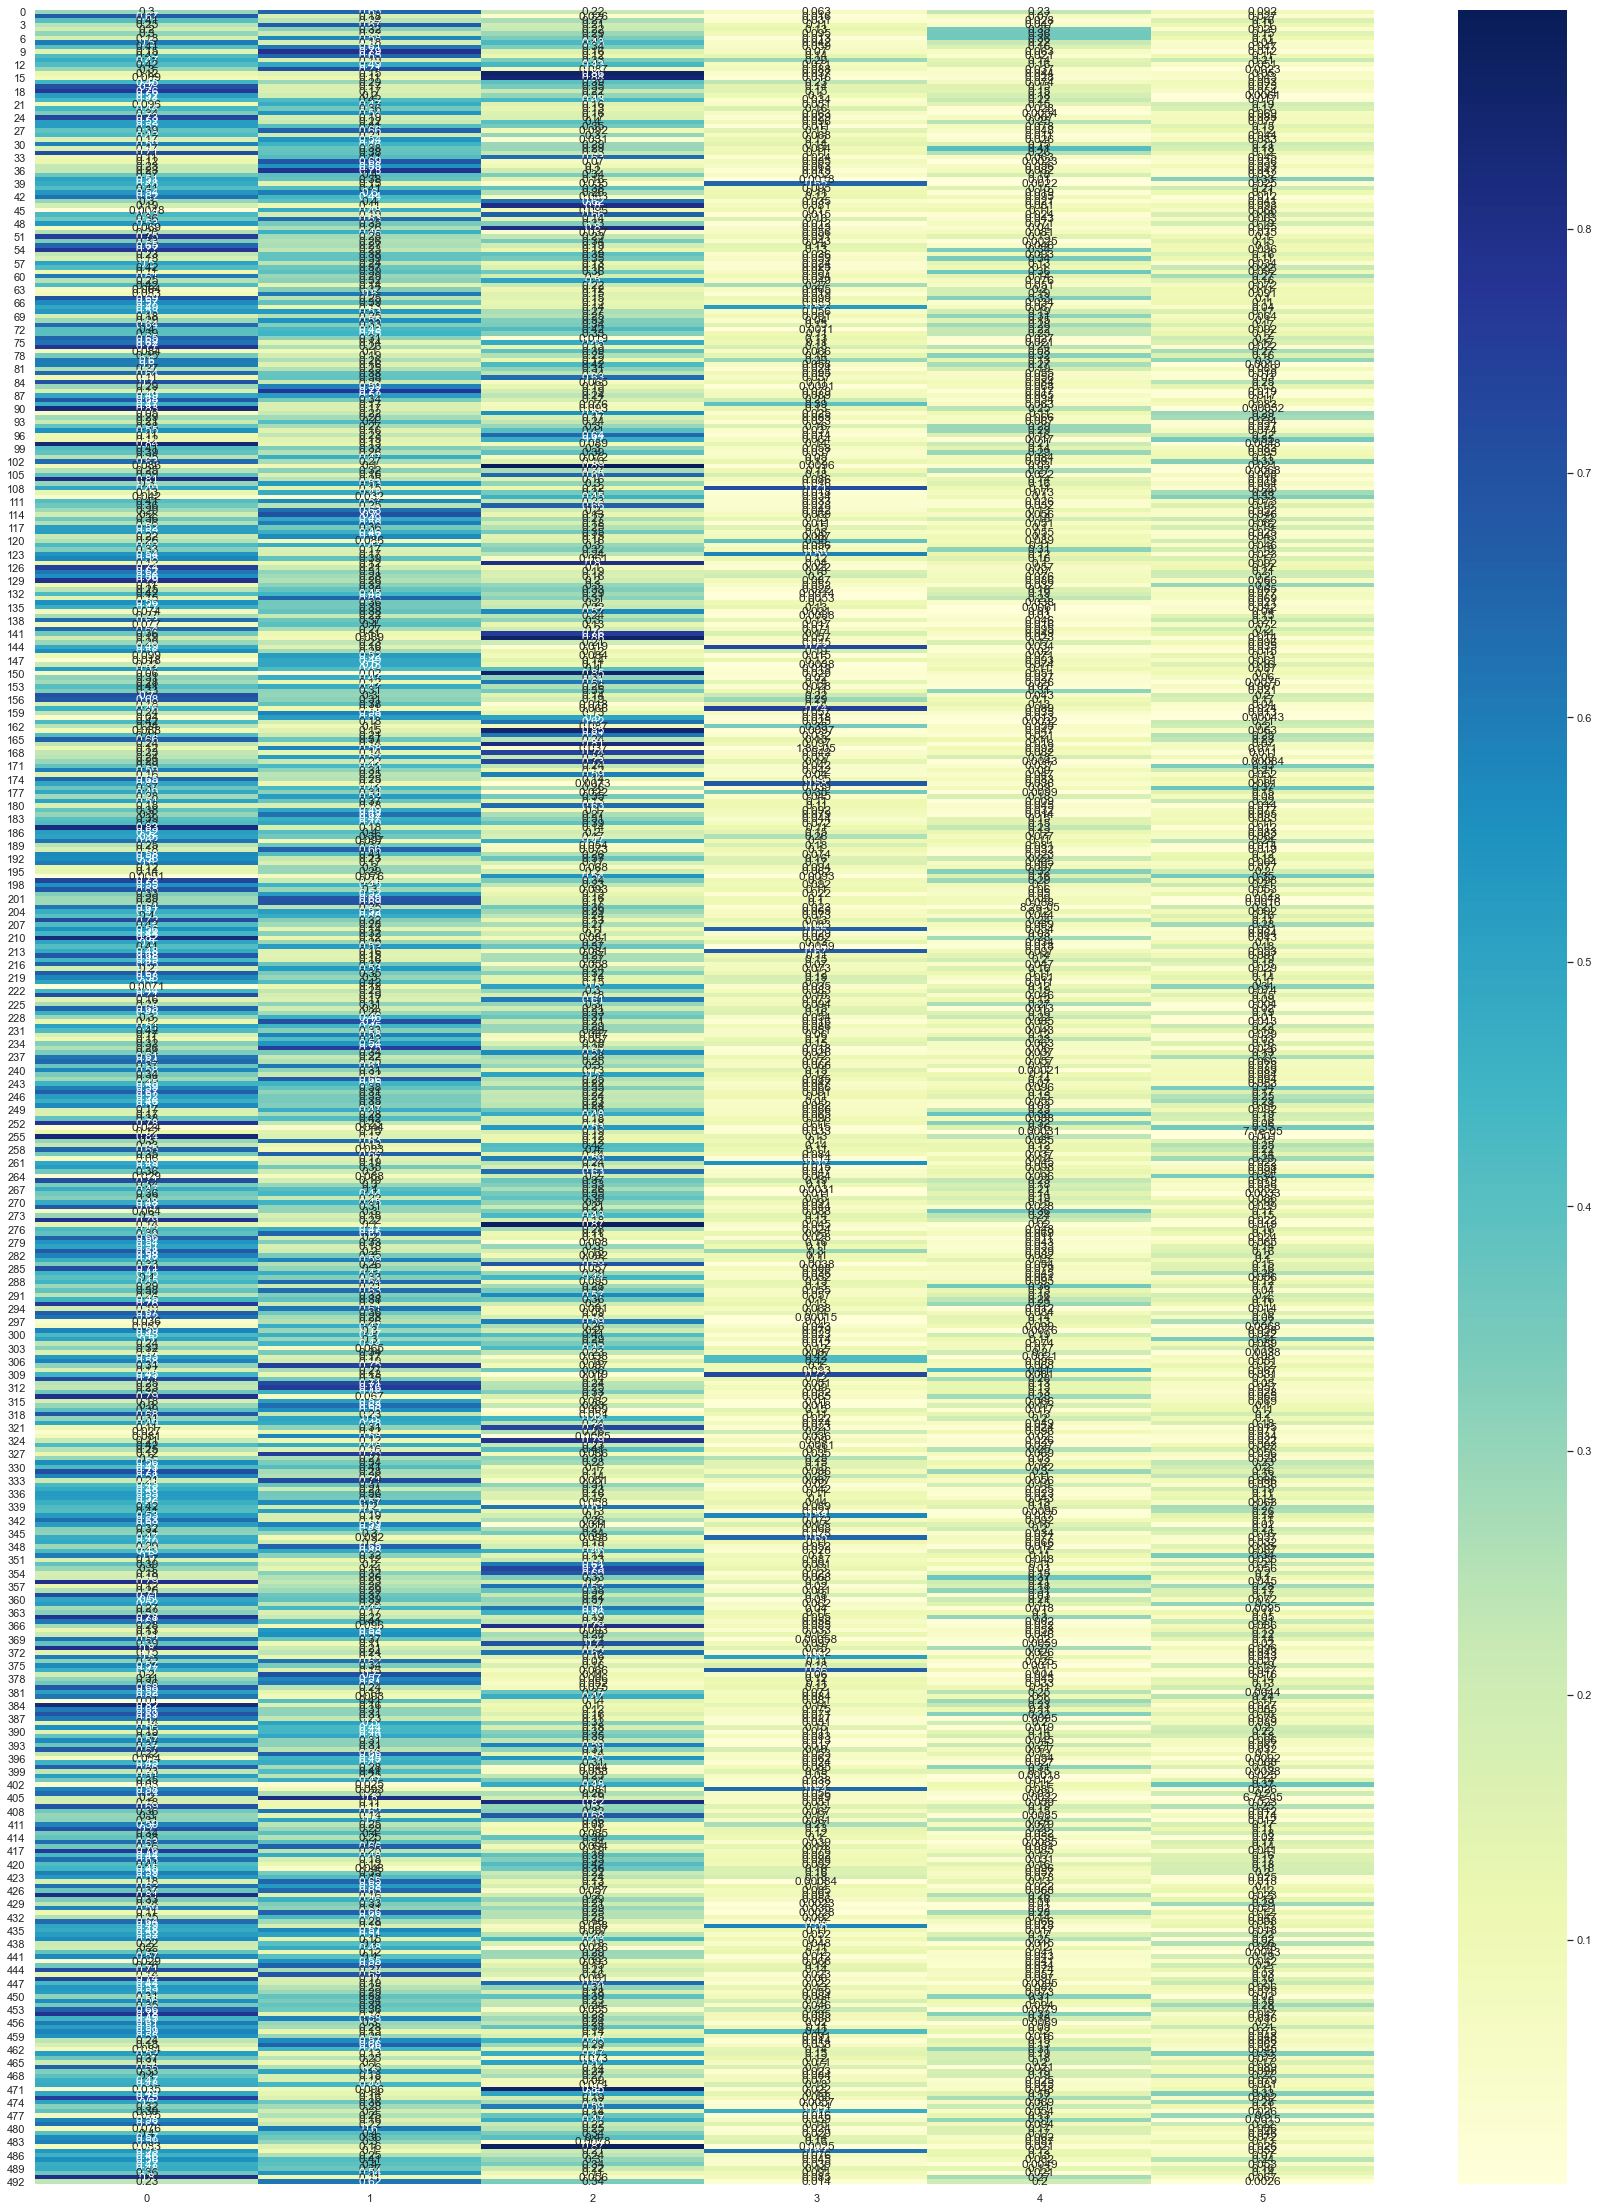

In [112]:
plt.figure(figsize=(30,40))
sns.heatmap(abs(fa.loadings_), cmap="YlGnBu", annot=True)

#  Evaluation 

**PCA Evaluation:**

The fact that the first component of PCA explains more than 40% of the variance suggests that it captures a significant portion of the variability in the stock returns. This indicates that a single component can explain a substantial amount of the information contained in the dataset.
You can assess the cumulative variance explained by multiple components to determine how many components are needed to capture a desired level of variance. Plotting the cumulative explained variance against the number of components can help identify the point of diminishing returns, where additional components contribute less to the overall variance.
Additionally, you can analyze the eigenvalues associated with each component. Higher eigenvalues indicate greater importance and contribute more to the explained variance. Examining the scree plot can help identify significant components based on the drop-off in eigenvalues.

**FA Evaluation:**

Factor Analysis aims to identify latent factors that explain the covariance structure in the data. Unlike PCA, which focuses on capturing maximum variance, FA explores underlying constructs or factors that drive the relationships between the stocks.
While PCA provides an orthogonal decomposition of the data, FA allows for the possibility of correlated factors, enabling a more interpretable representation of the underlying structure.
The performance of FA can be assessed by examining the factor loadings. These loadings represent the strength and direction of the relationship between each stock and the extracted factors. High loadings indicate a stronger association with a particular factor, suggesting a meaningful relationship.
It's important to note that FA requires additional subjective decisions, such as determining the number of factors to extract and selecting a rotation method to enhance interpretability.
By comparing the results of PCA and FA, you can look for patterns or relationships that emerge. For example, you can examine the stocks with high loadings on the first component in FA and compare them to the ones with high weights in the first principal component obtained from PCA. This analysis may reveal similarities or differences in the grouping or behavior of stocks.

In summary, PCA and FA offer different perspectives on analyzing and understanding the stock return dataset. While PCA emphasizes capturing maximum variance, FA focuses on identifying latent factors. Evaluating their respective performance can provide insights into the underlying structure and relationships within the data, aiding in pattern recognition and decision-making.

# Conclusions :

The high relationship observed between the returns of stocks can be attributed to the investments made by investment funds responsible for managing portfolios on behalf of individuals in the United States. Investment funds, such as mutual funds, exchange-traded funds (ETFs), and pension funds, pool together the financial resources of multiple investors and invest them in a diversified portfolio of stocks.

Here are a few reasons why the returns of stocks in these investment funds may exhibit a high relationship:

**Portfolio Diversification**: Investment funds aim to create diversified portfolios by investing in a wide range of stocks from different sectors and industries. This diversification strategy helps reduce the risk associated with individual stocks and aims to achieve a more stable overall return for the fund. Consequently, when certain sectors or industries perform well or poorly, the returns of the stocks in the investment fund's portfolio may move in a similar direction.

**Market Trends and Sentiment**: Investment funds closely monitor market trends, economic indicators, and investor sentiment. When there are positive or negative developments in the market or economy, investment funds may adjust their portfolios accordingly. This synchronized decision-making can lead to a high correlation among the returns of the stocks held by different funds, as they respond to similar market conditions.

**Benchmarking and Performance Evaluation**: Investment funds often benchmark their performance against a specific market index, such as the S&P 500. To achieve their investment objectives and demonstrate strong performance relative to the benchmark, fund managers may invest in stocks that closely align with the index constituents. This alignment can contribute to the high relationship among the returns of stocks held by different funds.

**Institutional Trading and Market Impact**: Investment funds, particularly those with substantial assets under management, can have a significant impact on the market when buying or selling stocks. Their large-scale transactions can influence stock prices and contribute to a synchronized movement in the returns of the stocks held by different funds.

It's important to note that while there may be a high relationship between the returns of stocks held by investment funds, the relationship is not absolute or constant. Stock returns are also influenced by **company-specific factors**, **market dynamics**, **economic conditions**,**Pandemics such as covid-19** and other external events. Additionally, different investment funds may have distinct investment strategies and holdings, which can introduce variations in their returns despite the overall relationship.